# Eigendecomposition

## Dependency

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Application of eigendecomposition

- Principal component analysis
- Regularization such as ridge regression
- Linear discriminant analysis
- Support vector machine

So you need to understand eigendecomposition.

## Eigenvalue

### How to compute eigenvalue

$$ A v = \lambda v $$
$$ A v - \lambda v = 0 $$
$$ (A - \lambda I) v = 0 $$

We cannot do $(A - \lambda) v$, because $A$ is a matrix, but $\lambda$ is a scalar.

$(A - \lambda I) v = 0$ means that a vector $v$ is in the **null space** of a matrix $A$ shifted by $-\lambda I$, because it's producting 0 vector. $B v = 0$ means $v$ is in the **null space** of a matrix $B$.

In eigendecomposition, we exclude a case where $v$ is a vector of all 0s. $v$ needs to have at least one element non-zero. So to produce 0 at the right side of the equation, $(A - \lambda I)$ must be a **singular matrix** (**reduced rank matrix**). If $(A - \lambda I)$ is a singular matrix, it means that a **determinant** of $(A - \lambda I)$ is 0.

$$ |A - \lambda I| = 0 $$

In $(A - \lambda I) v = 0$, $0$ is a 0 vector, but in $|A - \lambda I| = 0$, $0$ is a scalar 0. $|A - \lambda I| = 0$ is called **characteristic equation**.

### How eigenvalue is related to the matrix

If $A$ is a singular matrix (reduced-rank matrix, a matrix where one column can be a combination of other columns), at least one eigenvalue $\lambda$ is 0.

## Eigenvalue of diagonal matrix

Eigenvalues of a diagonal matrix are diagonal elements of the diagonal matrix. For example,

$$
A = 
\begin{bmatrix}
1 & 0\\
0 & 2
\end{bmatrix}
$$

$$
\begin{vmatrix}
1 - \lambda & 0\\
0 & 2 - \lambda
\end{vmatrix}
= 0
$$

$$
(1 - \lambda)(2 - \lambda) = 0
$$

$$
\lambda = 1, 2
$$

So we can imagine that, even if a diagonal matrix gets bigger, off-diagonal elements will disappear from **characteristic equations** and it gives us a bunch of $(d_i - \lambda) = 0$, so we can directly use diagonal elements as eigenvalues.

In [5]:
A = np.diag(np.arange(1, 10 + 1))

print('Diagonal matrix')
print(A)
print()

eigen_values = np.linalg.eig(A)[0]
print('Eigenvalues of diagonal matrix')
print(eigen_values)
print()

Diagonal matrix
[[ 1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 10]]

Eigenvalues of diagonal matrix
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]



## Eigenvalue of triangular matrix

Eigenvalues of a triangular matrix has the same result as a diagonal matrix. That is, regardless of upper triangular matrix or lower triangular matrix, eigenvalues will be diagonal elements of the triangular matrix. For example in 2x2 upper triangular matrix,

$$
A =
\begin{bmatrix}
1 & 2\\
0 & 3
\end{bmatrix}
$$

$$
\begin{vmatrix}
1 - \lambda & 2\\
0 & 3 - \lambda
\end{vmatrix}
= 0
$$

$$
(1 - \lambda)(3 - \lambda) = 0
$$

$$
\lambda = 1, 3
$$

Because when computing determinant and when making multiplication with diagonal elements, 0 at the either side of the diagonal cancels any number, so off-diagonal elements will disappear.

In [9]:
A = np.triu(np.random.randn(4, 4))

print('Upper triangular matrix')
print(np.round(A, 1))
print()

eigen_values = np.linalg.eig(A)[0]

print('Eigenvalue')
print(np.round(eigen_values, 1))
print()

Upper triangular matrix
[[-0.3  0.1  2.3 -1.8]
 [ 0.   1.1  0.4 -0.5]
 [ 0.   0.   1.  -1. ]
 [ 0.   0.   0.   0.5]]

Eigenvalue
[-0.3  1.1  1.   0.5]



In [10]:
A = np.tril(np.random.randn(4, 4))

print('Lower triangular matrix')
print(np.round(A, 1))
print()

eigen_values = np.linalg.eig(A)[0]

print('Eigenvalue')
print(np.round(eigen_values, 1))
print()

Lower triangular matrix
[[ 1.5  0.   0.   0. ]
 [-1.2  0.2  0.   0. ]
 [-0.7  0.5  0.1  0. ]
 [-1.2  1.5  1.1 -0.9]]

Eigenvalue
[-0.9  0.1  0.2  1.5]



## Eigenvector

Eigenvector is more important than eigenvector, but you need to compute eigenvalue before computing eigenvector

1. Find all eigenvalues $\lambda$
2. For each $\lambda$, find a vector $v$ which is in the **null space** of a shifted matrix by $\lambda$, $(A - \lambda I)$. That is $v \in C(A - \lambda I)$

$v$ in the null space of $(A - \lambda I)$ means that $(A - \lambda I) v$ gives us a vector with all 0s in elements. In math,

$$
(A - \lambda I) v = \textbf{0}
$$

Typically, after finding those vectors, people normalize it, meaning the vector has a unit length.

To double check the process to compute eigenvector, first find eigenvalues, and shift the original matrix by the eigenvalue, and find the **basis vector** (meaning normalized unit length vector) for the **null space** of the shifted matrix.

In [15]:
A = np.array([
    [1, 2],
    [2, 1]
])

print('Matrix')
print(A)
print()

evals, evecs = np.linalg.eig(A)

print('Eigenvector')
print(evecs)
print()

print('Eigenvalue')
print(evals)
print()

print(f'First eigenvalue: {evals[0]} has the associated eigenvector')
print(f'in first column of the eigenvector matrix: {evecs[:, 0]}')
print()

print(f'Second eigenvalue: {evals[1]} has the associated eigenvector')
print(f'in second column of the eigenvector matrix: {evecs[:, 1]}')

Matrix
[[1 2]
 [2 1]]

Eigenvector
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalue
[ 3. -1.]

First eigenvalue: 3.0000000000000004 has the associated eigenvector
in first column of the eigenvector matrix: [0.70710678 0.70710678]

Second eigenvalue: -0.9999999999999996 has the associated eigenvector
in second column of the eigenvector matrix: [-0.70710678  0.70710678]


## Diagonalization of a matrix with eigenvalues and eigenvectors

**Diagonalization** in the context of eigendecomposition means to extract a special property of a given matrix in a form of a diagonal matrix by using eigenvalue and eigenvector.

After decomposition, we have a set of eigen values and the according eigen vectors. For example in 3x3,

$$
A v_1 = \lambda_1 v_1
$$
$$
A v_2 = \lambda_2 v_2
$$
$$
A v_3 = \lambda_3 v_3
$$

These can be written in matrix as below. Let $v_{1} = [v_{11}, v_{21}, v_{31}]$

$$
\begin{bmatrix}
v_1 & v_2 & v_3
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0\\
0 & \lambda_2 & 0\\
0 & 0 & \lambda_3
\end{bmatrix}
=
\begin{bmatrix}
v_{11} & v_{12} & v_{13}\\
v_{21} & v_{22} & v_{23}\\
v_{31} & v_{32} & v_{33}
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0\\
0 & \lambda_2 & 0\\
0 & 0 & \lambda_3
\end{bmatrix}
=
\begin{bmatrix}
\lambda_1 v_{11} & \lambda_2 v_{12} & \lambda_3 v_{13}\\
\lambda_1 v_{21} & \lambda_2 v_{22} & \lambda_3 v_{23}\\
\lambda_1 v_{31} & \lambda_2 v_{32} & \lambda_3 v_{33}
\end{bmatrix}
$$

A matrix with eigenvectors must **left multiply** a diagonal matrix of eigenvalues because the below is wrong.

$$
\begin{bmatrix}
\lambda_1 & 0 & 0\\
0 & \lambda_2 & 0\\
0 & 0 & \lambda_3
\end{bmatrix}
\begin{bmatrix}
v_{11} & v_{12} & v_{13}\\
v_{21} & v_{22} & v_{23}\\
v_{31} & v_{32} & v_{33}
\end{bmatrix}
=
\begin{bmatrix}
\lambda_1 v_{11} & \lambda_1 v_{12} & \lambda_1 v_{13}\\
\lambda_2 v_{21} & \lambda_2 v_{22} & \lambda_2 v_{23}\\
\lambda_3 v_{31} & \lambda_3 v_{32} & \lambda_3 v_{33}
\end{bmatrix}
$$

That means that first eigenvalue is multiplied with the first element of each eigenvector. But it's wrong, becasue eigenvalue and eigenvector is a pair. You cannot mix an eigenvalue with a different eigenvector.

So a set of $A v_i = \lambda v_i$ can be written as below by using $A$ is the given matrix, $V$ is a matrix with eigenvectors in each column, and $\Lambda$ is a diagonal matrix of eigenvalues.

$$
A V = V \Lambda
$$

By right multiplying the both sides by $V^{-1}$

$$
A V V^{-1} = V \Lambda V^{-1}
$$
$$
A I = V \Lambda V^{-1}
$$
$$
A = V \Lambda V^{-1}
$$

That can be interpreted as a hidden insight of a given square matrix $A$ is a diagonal matrix $\Lambda$ by passing through $V$ and $V^{-1}$. And it also suggests that the given square matrix $A$ can be reconstructed by a set of eigenvectors $V$ and $V^{-1}$, and a diagonal matrix of eigenvalues $\Lambda$.

Also, after diagonalization, matrix powers will be easy.

$$
A = V \Lambda V^{-1}
$$

Suppose getting $A$ to the 3rd power

$$
A^3 = (V \Lambda V^{-1}) (V \Lambda V^{-1}) (V \Lambda V^{-1})
$$

By regrouping the matrices

$$
A^3 = V \Lambda (V^{-1} V) \Lambda (V^{-1} V) \Lambda V^{-1}
$$

Because $V^{-1} V = I$

$$
A^3 = V \Lambda I \Lambda I \Lambda V^{-1}
$$
$$
A^3 = V \Lambda \Lambda \Lambda V^{-1}
$$

Because $\Lambda$ is a diagonal matrix, so $D D = D^2$

$$
A^3 = V \Lambda^3 V^{-1}
$$

We just first did eigendecomposition, and get the power, but it still works by first getting power and do eigendecomposition, because if we have $A x = \lambda x$, $A^2$ is

$$
A^2 x = A A x
$$

Because $A x = \lambda x$

$$
A^2 x = A A x = A \lambda x
$$

We cannot change the order of matrix multiplication, but $\lambda$ is a scalar, so we can move it, so move it front

$$
A^2 x = A A x = A \lambda x = \lambda A x
$$

Because $A x = \lambda x$

$$
A^2 x = A A x = A \lambda x = \lambda A x = \lambda \lambda x
$$

Because $\lambda$ is a scalar

$$
A^2 x = A A x = A \lambda x = \lambda A x = \lambda \lambda x = \lambda^2 x
$$
$$
A^2 x = \lambda^2 x
$$

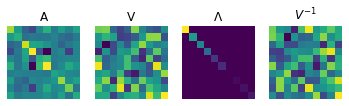

In [10]:
A = np.random.randn(10, 10)
A = A.T @ A

# D: eigenvalue, V: eigenvector
D, V = np.linalg.eig(A)

# Visualize
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()

In [5]:
A = np.random.rand(2, 2)

print('A')
print(np.round(A, 3))
print()

# Matrix powers by function
print('A^3')
print(np.round(np.linalg.matrix_power(A, 3), 3))
print()

# Matrix powers by eigendecomposition and diagonalization
# D: eigenvalue, V: eigenvector
D, V = np.linalg.eig(A)
D = np.diag(D)
result = V @ D @ D @ D @ np.linalg.inv(V)

print('V Lambda^3 V^{-1}')
print(np.round(result, 3))
print()

A
[[0.903 0.968]
 [0.75  0.071]]

A^3
[[2.101 1.559]
 [1.209 0.759]]

V Lambda^3 V^{-1}
[[2.101 1.559]
 [1.209 0.759]]



A
[[ 120.  -68. -186.   66.]
 [ -68.  363.   72.  -19.]
 [-186.   72.  587. -306.]
 [  66.  -19. -306.  270.]]

V
[[ 0.27099937 -0.77804337 -0.55510939  0.11428655]
 [-0.18018525 -0.08023779 -0.17413038 -0.96476618]
 [-0.81779671 -0.47451288  0.29446638  0.13905258]
 [ 0.47465899 -0.40379194  0.75816999 -0.19190931]]

Lambda
[[842.10603029   0.           0.           0.        ]
 [  0.          33.80262392   0.           0.        ]
 [  0.           0.         107.19290412   0.        ]
 [  0.           0.           0.         356.89844167]]

Reconstructed A
[[ 120.  -68. -186.   66.]
 [ -68.  363.   72.  -19.]
 [-186.   72.  587. -306.]
 [  66.  -19. -306.  270.]]



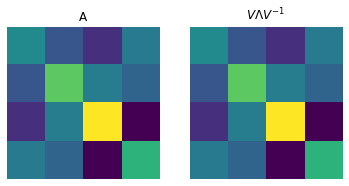

These should be the same


In [11]:
# Make a square matrix for eigendecomposition to be possible
# Round it to make it integers to avoid having complex numbers
A = np.round(10 * np.random.randn(4, 4))
A = A.T @ A

print('A')
print(A)
print()

# Eigendecomposition
evals, evecs = np.linalg.eig(A)

print('V')
print(evecs)
print()

print('Lambda')
print(np.diag(evals))
print()

# Test reconstructing given matrix from eigenvalues eigenvectors
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)

print('Reconstructed A')
print(Ap)
print()

# Visualize
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V \Lambda V^{-1}$')

plt.show()

print('These should be the same')

## Relationship between eigenvalue and eigenvector

Distinct eigenvalues $\lambda$'s leads to distinct eigenvectors $v$'s. But when we have the same eigenvalues (**repeated eigenvalues**), the repeated eigenvectors form the single eigenvector (producing the same vector), or the repeated eigenvectors form the **eigenplane**.

For example,

$$
A =
\begin{bmatrix}
3 & 1\\
0 & 3
\end{bmatrix}
$$

By **characteristic equation** to find eigenvalues,

$$
\lambda^2 - 6 \lambda + 9 = 0
$$
$$
(\lambda - 3)^2 = 0
$$
$$
\lambda = 3, 3
$$

When $\lambda_1 = 3$,

$$
(A - 3 I) =
\begin{bmatrix}
3 - 3 & 1\\
0 & 3 - 3
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
$$
$$
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
v_1
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$
$$
v_1 =
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

For $\lambda_2$, it will have the same direction $v_2 = scaler [1, 0]$. This is the case where repeated eigenvalues for the single eigenvector.

## Eigendecomposition of symmetric matrix

Eigendecomposition of **symmetrix matrix** has the following 2 properties, assuming it has **distinct eigenvalues**

1. Eigenvalues are real values, no complex numbers.
2. Eigenvectors are all pair-wise orthogonal, meaning $V^{-1} = V^T$

If two vectors are orthogonal, the dot product is 0, so start from making a dot product. Below $v_1$ and $v_2$ are eigenvectors.

$$
\lambda_1 v_1^t v_2
$$

Because $A v_1 = \lambda_1 v_1$,

$$
\lambda_1 v_1^t v_2 = (A v_1)^T v_2
$$

By **LIVE EVIL rule**,

$$
\lambda_1 v_1^t v_2 = (A v_1)^T v_2 = v_1^T A^T v_2
$$

Because a given matrix is symmetrix ($A^T = A$), and because $A v_2 = \lambda_2 v_2$,

$$
\lambda_1 v_1^t v_2 = (A v_1)^T v_2 = v_1^T A^T v_2 = v_1^T A v_2 = v_1^T \lambda_2 v_2 
$$

Becuase $\lambda_2$ is a scalar and we can move it forward by changing order,

$$
\lambda_1 v_1^t v_2 = (A v_1)^T v_2 = v_1^T A^T v_2 = v_1^T A v_2 = v_1^T \lambda_2 v_2 = \lambda_2 v_1^T v_2  
$$

Extract the first and the last expression,

$$
\lambda_1 v_1^T v_2 = \lambda_2 v_1^T v_2  
$$
$$
\lambda_1 v_1^T v_2 - \lambda_2 v_1^T v_2 = 0
$$
$$
(\lambda_1 - \lambda_2) v_1^T v_2 = 0
$$

Because eigenvalues are distinct, $\lambda_1$ and $\lambda_2$ won't be the same, so $(\lambda_1 - \lambda_2)$ is not 0. For the right hand side of the above equation to be 0, $v_1^T v_2$ needs to be 0. When a dot product is 0, those vectors are orthogonal, so $v_1$ and $v_2$ are orthogonal. So **symmetrix matrix has orthogonal eigenvectors as long as eigenvalues are distinct**.

It means that $V^T V$ gives a diagonal matrix, because row and columns are orthogonal. By default eigenvectors are not guaranteed to be a unit vector (not normalized to be the length of a vector 1). But when we normalize each columns of a matrix with eigenvectors in columns, pair-wise dot product produces 1, so from a matrix of eigenvectors $V$,

$$
V^T V = 1
$$

Because $A^{-1} A = I$,

$$
V^T = V^{-1}
$$

It means that we don't need to do inverse calculation (difficult compute and time consuming). We can replace it with just a transpose.

A
[[-3.3 -1.2 -2.4  0.2  0.3]
 [-1.2  2.4  0.3 -0.5 -0.1]
 [-2.4  0.3  1.2 -0.8  1.6]
 [ 0.2 -0.5 -0.8  1.9  0.1]
 [ 0.3 -0.1  1.6  0.1 -3.9]]

Confirm, by default, numpy normalizes the eigenvectors
[1. 1. 1. 1. 1.]


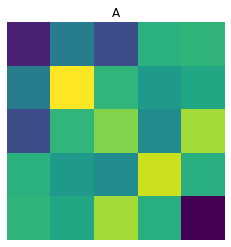

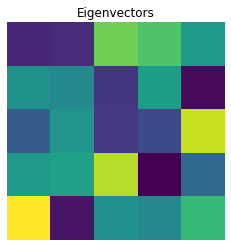

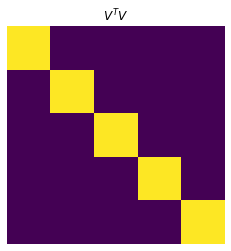

V^T V is an identity matrix
[[ 1.  0.  0. -0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0. -0.  1.  0. -0.]
 [-0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0.  1.]]



In [14]:
# Make a symmetic matrix by addition method (it can be replaced with A^T @ A)
A = np.random.randn(5, 5)
A = A + A.T

print('A')
print(np.round(A, 1))
print()

# Get eigenvector
evals, evecs = np.linalg.eig(A)

# Confirm, by default, numpy normalizes the eigenvectors
print('Confirm, by default, numpy normalizes the eigenvectors')
print(np.sqrt(sum(evecs ** 2)))

# Visualize V^T V
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs.T @ evecs)
plt.axis('off')
plt.title('$V^T V$')
plt.show()

print('V^T V is an identity matrix')
print(np.round(evecs.T @ evecs, 1))
print()

A
[[ 0.1  0.6 -1.   0.8 -0.3]
 [-0.1  1.2 -0.8  0.7  0.8]
 [-0.4  1.4  0.6  0.8 -2.2]
 [ 1.9  1.   0.2  2.1  0.3]
 [-2.1  0.7 -2.3 -1.1 -1.9]]



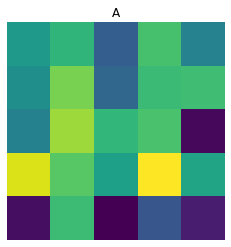

For eigenvectors from non-symmetrix matrix, V^T V is not an identity matrix
[[1. +0.j  0.1+0.j  0.1-0.j  0.1+0.j  0.4+0.j ]
 [0.1+0.j  0.6+0.2j 1. +0.j  0.3-0.j  0.4-0.1j]
 [0.1-0.j  1. +0.j  0.6-0.2j 0.3+0.j  0.4+0.1j]
 [0.1+0.j  0.3-0.j  0.3+0.j  1. +0.j  0.4+0.j ]
 [0.4+0.j  0.4-0.1j 0.4+0.1j 0.4+0.j  1. +0.j ]]



In [24]:
# Make a non-symmetic matrix to confirm it doesn't produce identity matrix by V^T V
A = np.random.randn(5, 5)

print('A')
print(np.round(A, 1))
print()

# Get eigenvector
evals, evecs = np.linalg.eig(A)

# # Confirm, by default, numpy normalizes the eigenvectors
# print('Confirm, by default, numpy normalizes the eigenvectors')
# print(np.sqrt(sum(evecs ** 2)))

# Visualize V^T V
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

# Not easy to visualize it because eigenvectors of non-sysmmetric matrix contain complex numbers
# plt.imshow(evecs)
# plt.axis('off')
# plt.title('Eigenvectors')
# plt.show()

# plt.imshow(evecs.T @ evecs)
# plt.axis('off')
# plt.title('$V^T V$')
# plt.show()

print('For eigenvectors from non-symmetrix matrix, V^T V is not an identity matrix')
print(np.round(evecs.T @ evecs, 1))
print()

## Eigenlayer

From a given square matrix $A$, either a symmetrix matrix or non-symmetrix matrix, eigendecomposition and diagonalization of the matrix gives us the following

$$
A = V \Lambda V^{-1}
$$

$V$ is a matrix with **eigenvectors** in each column, and $\Lambda$ is a diagonal matrix with **eigenvalues** in each diagonal element. From one eigenvector $v_i$ and the corresponding eigenvalue $\lambda_i$ from the decomposition, we can create a matrix like below

$$
v_i \lambda_i v_i^{-1} = A_i
$$

Because $V^{-1} = V^T$ and $v_i^{-1} = v_i^t$,

$$
v_i \lambda_i v_i^{T} = A_i
$$

This is a column vector ($v_i$, mx1) times a row vector ($v_i^{T}$, 1xm), scaled by $\lambda_i$, giving us a matrix (mxm). It's actually an **outer product** of an eigenvector. We can think of this one matrxi as one layer of the given matrix $A$. If we wanna reconstruct $A$ (mxn), we can use the following equation.

$$
A = \sum_{i=1}^{n} v_i \lambda_i v_i^{-1} = \sum_{i=1}^{n} v_i \lambda_i v_i^{T}
$$

We can arbitrarily choose a number $n$ as long as it doesn't exceed $n$. So it means that we can only sum the first 1 to $i$ layers to recontruct $A$.

**Numpy** (and most of the other softwares) by default normalizes eigenvectors to have a unit length. It means that $V V^{-1}$ gives the matrix which has all 1s in the diagonal elements, because each pair of vectors are orthogonal. So the magnitude of each eigenvector is 1. It means eigenvectors $v_i$ only give us the direction. And eigenvalues $\lambda_i$ give us the importance  of each eigenvector.

$$
||v_i|| = 1
$$
$$
||\lambda_i|| \neq 1
$$

**Eigenvectors** point in the **important direction** in the space of matrix $A$, and **eigenvalues** tell us **how important** those specific directions are. The larger the magnitude of eigenvalue is, the more important the direction is in the space of matrix $A$.

In [16]:
# Create a matrix A
m = 5
A = np.random.randn(m, m)

# To work with only real values in eigendecomposition, make it symmetrix matrix
A = np.round(10 * A.T @ A)

print('A')
print(A)
print()

# Eigendecomposition
D, V = np.linalg.eig(A)

# Create one layer by one eigenvalue and eigenvector
i = 2
v = V[:, i]
op = np.outer(v, v)
op_scaled = D[i] * np.outer(v, v)

print('One eigenvector v')
print(v.shape)
print(v)
print()

print('Outer product of v')
print(np.round(op, 1))
print()

print('Magnitude of outer product of v')
print(np.linalg.norm(op))
print()

print('Corresponding eigenvalue')
print(D[i])
print()

print('Outer product of v scaled by corresponding eigenvalue')
print(np.round(op_scaled, 1))
print()

print('Magnitude of outer product of v scaled by eigenvalue')
print(np.linalg.norm(op_scaled))
print()

# Reconstruct the given matrix A from eigenlayers
Arecon = np.zeros((m, m))

for i in range(m):
    
    # Get eigenvector
    v = np.reshape(V[:, i], (m, 1))

    # Sum up each eigenlayer by outer product of eigenvector and scale by eigenvalue
    Arecon += v * D[i] * v.T
    
    # Check in each sum, rank of matrix increase
    print(f'i: {i}, rank: {np.linalg.matrix_rank(Arecon)}')
    
print()
print('A')
print(A)
print()

print('A reconstructed')
print(np.round(Arecon))
print()

print('A - A reconstructed')
print(np.round(A - Arecon))
print()

A
[[ 75.   9.  17. -35.   9.]
 [  9.  44.  15. -19.  13.]
 [ 17.  15.  49. -31.  11.]
 [-35. -19. -31.  36. -27.]
 [  9.  13.  11. -27.  45.]]

One eigenvector v
(5,)
[-0.74457964  0.42862271  0.25344267 -0.09133395  0.43509614]

Outer product of v
[[ 0.6 -0.3 -0.2  0.1 -0.3]
 [-0.3  0.2  0.1 -0.   0.2]
 [-0.2  0.1  0.1 -0.   0.1]
 [ 0.1 -0.  -0.   0.  -0. ]
 [-0.3  0.2  0.1 -0.   0.2]]

Magnitude of outer product of v
0.9999999999999998

Corresponding eigenvalue
54.48012201754042

Outer product of v scaled by corresponding eigenvalue
[[ 30.2 -17.4 -10.3   3.7 -17.6]
 [-17.4  10.    5.9  -2.1  10.2]
 [-10.3   5.9   3.5  -1.3   6. ]
 [  3.7  -2.1  -1.3   0.5  -2.2]
 [-17.6  10.2   6.   -2.2  10.3]]

Magnitude of outer product of v scaled by eigenvalue
54.48012201754041

i: 0, rank: 1
i: 1, rank: 2
i: 2, rank: 3
i: 3, rank: 4
i: 4, rank: 5

A
[[ 75.   9.  17. -35.   9.]
 [  9.  44.  15. -19.  13.]
 [ 17.  15.  49. -31.  11.]
 [-35. -19. -31.  36. -27.]
 [  9.  13.  11. -27.  45.]]

A rec

## Eigendecomposition of singular matrix

Eigendecomposition can also be applied to **singular matrix** (non-invertible matrix, its determinant is 0). In such case, there will be at least one 0 eigenvalue. The **determinant** is equal to the **product** of all **eigenvalues**. So to know the rank of a singular matrix, we can count the number of non-zero eigenvalues.

In [26]:
# Create a full rank matrix
A = np.random.randn(7, 7)
tr = np.matrix.trace(A)
dt = np.linalg.det(A)
l = np.linalg.eig(A)[0]

print('A')
print(f'Shape of A: {A.shape}')
print(f'Rank of A: {np.linalg.matrix_rank(A)}')
print(np.round(A, 1))
print()

print('Eigenvalue')
print(l)
print()

print(f'Trace: {tr}')
print(f'Sum of all eigenvalues: {sum(l)}')
print()

print(f'Determinant: {dt}')
print(f'Product of all eigenvalues: {np.prod(l)}')
print()

# Create a singular matrix
A = np.random.randn(7, 5) @ np.random.randn(5, 7)
tr = np.matrix.trace(A)
dt = np.linalg.det(A)
l = np.linalg.eig(A)[0]

print('A')
print(f'Shape of A: {A.shape}')
print(f'Rank of A: {np.linalg.matrix_rank(A)}')
print(np.round(A, 1))
print()

print('Eigenvalue')
print(l)
print()

print(f'Trace: {tr}')
print(f'Sum of all eigenvalues: {sum(l)}')
print('Traces are the same')
print()

print(f'Determinant: {dt}')
print(f'Product of all eigenvalues: {np.prod(l)}')
print('Determinants are the same, but they are 0, because at least one eigenvalue is 0')
print()

A
Shape of A: (7, 7)
Rank of A: 7
[[-0.7 -0.8  1.4  0.7 -0.2  1.1 -1.1]
 [ 1.3 -0.8  1.6 -0.9  1.2  2.7  1. ]
 [-0.4  0.3 -2.2 -0.4  0.3 -1.1  0.9]
 [-1.4  0.3  0.4 -1.   1.8 -1.3  0.2]
 [-0.3 -0.5  0.5 -0.8 -0.6 -1.1 -0.5]
 [-0.3  1.6 -1.  -0.5  0.6 -1.2  0.1]
 [-0.3  1.   0.4  1.2 -0.2  1.3 -0. ]]

Eigenvalue
[-3.25747976+0.j          0.97910402+0.j          0.87007484+0.j
 -1.07633039+1.64128456j -1.07633039-1.64128456j -1.14150372+0.j
 -1.95358794+0.j        ]

Trace: -6.656053343562339
Sum of all eigenvalues: (-6.65605334356234+0j)

Determinant: -23.83953615616962
Product of all eigenvalues: (-23.839536156169533+0j)

A
Shape of A: (7, 7)
Rank of A: 5
[[ 0.3 -0.8  1.5 -0.3  1.2 -1.7 -0.7]
 [ 1.9 -2.5  0.5  2.9  1.   0.9  2.2]
 [ 0.9 -1.8  2.5 -0.1  1.5 -1.9  0.7]
 [ 2.3  0.4  0.6  1.6  0.8  0.7  1.8]
 [-0.4 -0.  -0.   0.9 -0.4  0.5 -0. ]
 [-0.8  5.6 -1.5  0.5 -2.2  2.1 -1.1]
 [ 0.8 -3.1  3.   2.7  2.9 -2.9 -2.1]]

Eigenvalue
[ 4.04098645e+00+2.22567325j  4.04098645e+00-2.22567325j
